# Análise e Carregamento de Dados


In [1]:
# Carregando o dataset
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Análise do formato dos dados
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
# Análise dos tipos de saída, buscando valores unicos nos rótulos de treino
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

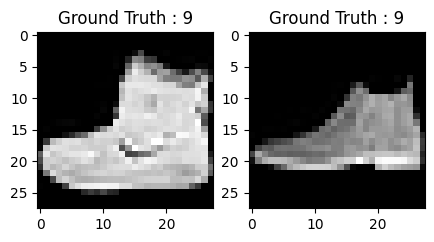

In [4]:
# Uma olhada nas imagens
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
# Processamento dos dados
# Convertendo as imagens 28x28 para matrizes 28x28x1
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
# Convertendo de int8 para float64, escalando os valores de pixel entre 0 e 1;.
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
# Converter os rótulos de classe(categóricos) em codificação one-hot
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
# Separando o dataset em treino e validação
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

# Modelo 1.0

Arquitetura do nosso modelo CNN



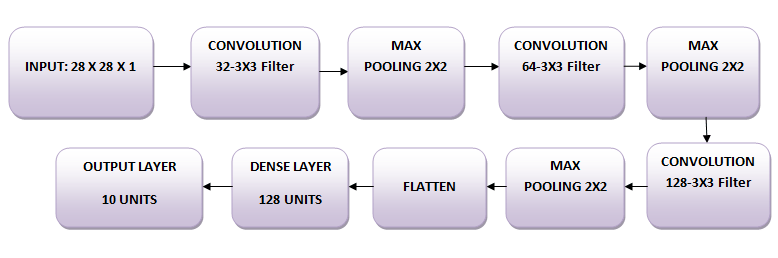

In [9]:
# Importando os módulos necessários
import keras
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [10]:
# Configurando parâmetros do modelo
batch_size = 64
epochs = 20
num_classes = 10

In [11]:
# Montando a arquitetura do Modelo
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

* A função **Sequential()** inicializa um objeto de modelo vazio.

* A função **Conv2D()** adiciona uma camada convolucional 2D ao modelo com 32 filtros, um tamanho de kernel de 3x3 e uma função de ativação linear.

* A função **LeakyReLU()** adiciona uma função de ativação de unidade linear retificada com vazamento ao modelo com um valor alfa. Isso ajuda a prevenir o problema do gradiente desvanecente e melhora o desempenho do modelo.

* A função **MaxPooling2D()** adiciona uma camada de max pooling 2D ao modelo com um tamanho de pool menor (2x2). Isso reduz as dimensões espaciais dos mapas de características e ajuda a evitar o overfitting.

* Os passos acima são **repetidos** com um número crescente de filtros (64 e 128) e o mesmo tamanho de kernel e preenchimento.

* A função **Flatten()** retifica a saída da camada anterior em um array 1D, que pode ser alimentado em uma camada totalmente conectada.

* A função **Dense()** adiciona uma camada totalmente conectada ao modelo com 128 neurônios e uma função de ativação linear.

* A função **LeakyReLU()** é novamente adicionada ao modelo.

* A função **Dense()** adiciona uma camada de saída ao modelo com um número de neurônios igual ao número de classes no conjunto de dados e uma função de ativação softmax. Isso permite que o modelo gere uma distribuição de probabilidade sobre as classes para cada imagem de entrada.


In [12]:
# Compilando o modelo com o otimizador Adam
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [13]:
# Visualizando a arquitetura do modelo criado
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [14]:
# Treinando o modelo
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 19s 12ms/step - loss: 0.4691 - accuracy: 0.8270 - val_loss: 0.3087 - val_accuracy: 0.8883
Epoch 2/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2860 - accuracy: 0.8954 - val_loss: 0.3100 - val_accuracy: 0.8832
Epoch 3/20
750/750 [==============================] - 8s 10ms/step - loss: 0.2416 - accuracy: 0.9120 - val_loss: 0.2473 - val_accuracy: 0.9079
Epoch 4/20
750/750 [==============================] - 8s 11ms/step - loss: 0.2063 - accuracy: 0.9235 - val_loss: 0.2412 - val_accuracy: 0.9099
Epoch 5/20
750/750 [==============================] - 6s 8ms/step - loss: 0.1835 - accuracy: 0.9324 - val_loss: 0.2217 - val_accuracy: 0.9181
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1600 - accuracy: 0.9398 - val_loss: 0.2288 - val_accuracy: 0.9206
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1375 - accuracy: 0.9488 - val_loss: 0.2783 - val_accuracy: 0.9047
E

In [15]:
# Avaliação do modelo
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.491228848695755
Test accuracy: 0.9158999919891357


Teve um ótimo desempenho, mas apresenta sinais de overfitting, vamos analisar mais a fundo

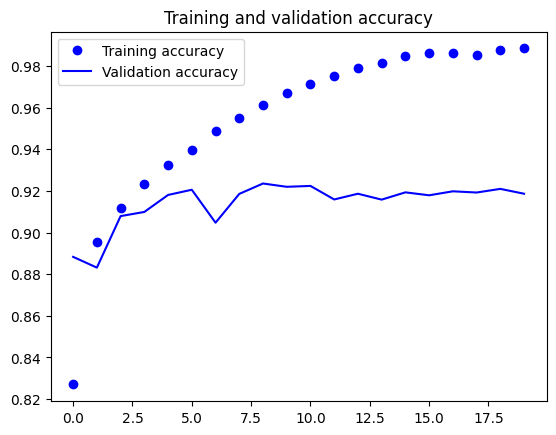

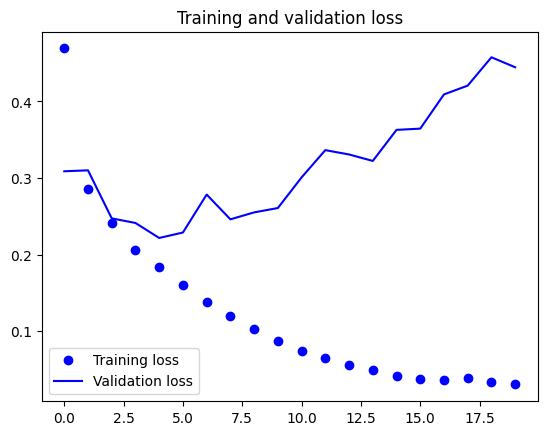

In [16]:
#Plotando gráficos da accuracy e loss para treino e validação
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Os dois gráficos mostram que a precisão de validação quase parou de aumentar após 4-5 épocas e raramente teve aumentos em certas épocas. No início, a precisão de validação aumentava linearmente com a perda, mas depois não teve muitos avanços.

A perda de validação mostra que isso é um sinal de overfitting, similar à precisão de validação, diminuiu linearmente, mas após 4-5 épocas começou a aumentar. Isso significa que o modelo tentou memorizar os dados e teve sucesso.

Com isso em mente, é hora de introduzir algum dropout em nosso modelo e ver se isso ajuda a reduzir o overfitting.

# Modelo 2.0 com Dropout

O **dropout** desativa aleatoriamente uma fração dos neurônios durante o processo de treinamento, reduzindo a dependência no conjunto de treinamento em alguma medida. A quantidade de neurônios a serem desativados é decidida por um hiperparâmetro, que pode ser ajustado adequadamente. Dessa forma, desligar alguns neurônios não permitirá que a rede memorize os dados de treinamento, já que nem todos os neurônios estarão ativos ao mesmo tempo e os neurônios inativos não serão capazes de aprender nada.

In [17]:
#Parametros do modelo
batch_size = 64
epochs = 20
num_classes = 10

In [18]:
# Nova montagem do modelo com dropout
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [19]:
# Visualizando os módulos adicionados
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

Agora dentro da arquitetura do nosso modelo temos 3 pontos de dropout que devem minimizar o overfitting que estava acontecendo.

In [20]:
# Compilando com otimizador Adam
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [21]:
# Treinando o modelo com dropout adicionado
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 10s 6ms/step - loss: 0.5899 - accuracy: 0.7804 - val_loss: 0.3649 - val_accuracy: 0.8673
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3683 - accuracy: 0.8651 - val_loss: 0.2980 - val_accuracy: 0.8898
Epoch 3/20
750/750 [==============================] - 5s 7ms/step - loss: 0.3272 - accuracy: 0.8790 - val_loss: 0.2760 - val_accuracy: 0.8988
Epoch 4/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2974 - accuracy: 0.8892 - val_loss: 0.2683 - val_accuracy: 0.8996
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.2790 - accuracy: 0.8961 - val_loss: 0.2538 - val_accuracy: 0.9054
Epoch 6/20
750/750 [==============================] - 5s 7ms/step - loss: 0.2653 - accuracy: 0.9013 - val_loss: 0.2449 - val_accuracy: 0.9080
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.2548 - accuracy: 0.9048 - val_loss: 0.2409 - val_accuracy: 0.9114
Epoch

In [22]:
# Salvando o modelo para otimizar o tempo nas próximas execuções
fashion_model.save("fashion_model_dropout.h5py")

In [23]:
# Avaliando o modelo final
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 1s 4ms/step - loss: 0.2205 - accuracy: 0.9189


In [24]:
# Analisando acc e loss
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22051215171813965
Test accuracy: 0.9189000129699707


Ótimo! Mesmo não havendo uma melhora na 'accuracy' e a 'loss' diminuiu bastante o que aponta que o problema de overfitting deve ter sido solucionado.

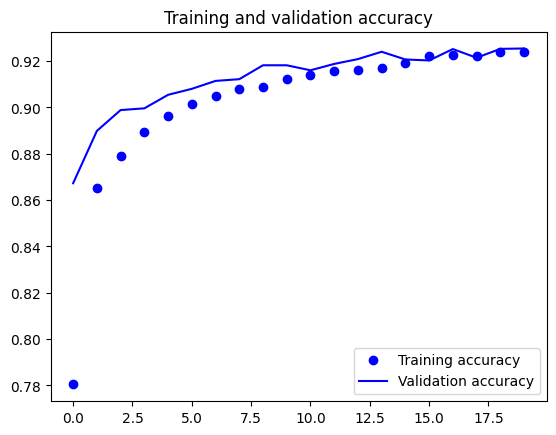

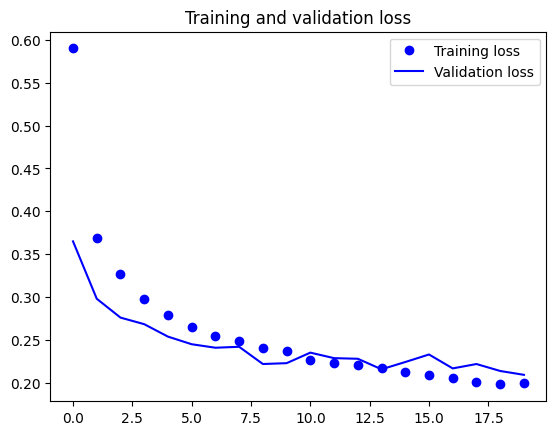

In [26]:
# Plotando os gráficos comparativos de treino e validação
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


É possível observar que a 'loss' e a 'accuracy' de validação estão em sincronia com as de treinamento. A perda de validação está diminuindo e não aumentando, que mostra que o modelo não está sofrendo overfitting.

Portanto, é possível afirmar que a capacidade de generalização do modelo melhorou significativamente, uma vez que a 'loss' tanto no conjunto de teste quanto no conjunto de validação foi semelhante a de treinamento.

# Prevendo as classes

In [27]:
# Prevendo as classes dos dados de teste
predicted_classes = fashion_model.predict(test_X)

313/313 [==============================] - 1s 2ms/step


Como as previsões obtidas são valores de ponto flutuante, não é viável comparar os rótulos previstos com os rótulos verdadeiros do teste. Então, arredondaremos a saída, para converter os valores de ponto flutuante em números inteiros.

Além disso, usaremos np.argmax() para selecionar o índice que possui o valor mais alto em uma linha.
Por exemplo, suponha uma previsão para uma imagem de teste seja 0 1 0 0 0 0 0 0 0 0, a saída para isso deveria ser um rótulo de classe 1.

In [29]:
# Selecionando o índice com valor mais alto
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

AxisError: ignored

In [30]:
# Verificando o tamanho dos nossos gabaritos
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9156 correct labels


<ipython-input-36-cc13ec52ab98>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


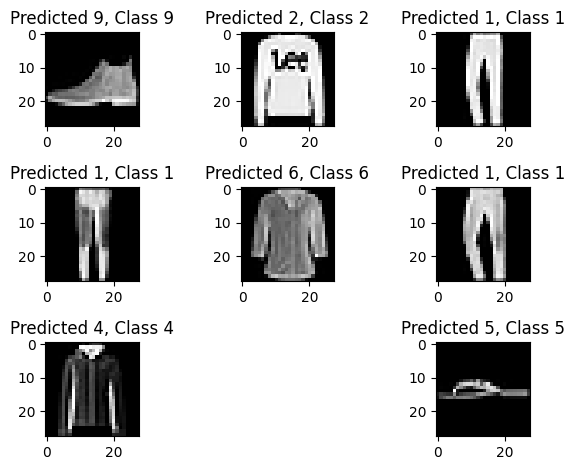

In [36]:
# Buscando os acertos
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 844 incorrect labels


<ipython-input-38-a34d2cf2e4d5>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


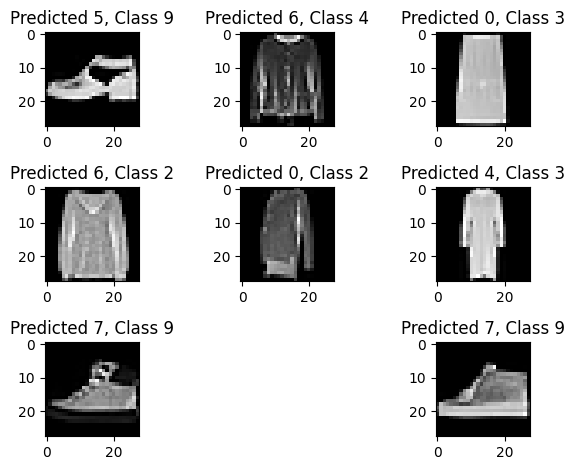

In [38]:
# Buscando os erros
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


Ao observar algumas imagens, não é possível ter certeza do motivo pelo qual o modelo não consegue classificar corretamente as imagens acima, mas parece que uma variedade de padrões semelhantes presentes em várias classes afeta o desempenho do classificador, apesar de a CNN ser uma arquitetura robusta.

In [39]:
# Relatório de classificação
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.89      0.86      0.87      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.86      0.89      0.87      1000
     Class 5       0.98      0.99      0.99      1000
     Class 6       0.81      0.71      0.76      1000
     Class 7       0.95      0.98      0.96      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.99      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Podemos observar que o classificador está com um desempenho abaixo do esperado na classificação da classe 6.
O modelo apresenta falta de precisão nas classes 0 e 4, e apresentou um desempenho ligeiramente fora do esperado para a classe 4 tanto em precisão quanto recall.

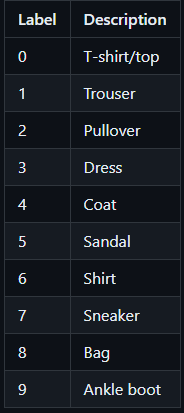

É possível que o modelo esteja com dificuldade para diferenciar os artigos das classe 0, 2, 4 e 6 pela semelhança entre os mesmos, que são blusas e casacos de mangas compridas em sua maioria.